In [1]:
# section 1 load all the necessary modules and packages
import glob
import time
import netCDF4 as nc4 
import numpy as np
import pandas as pd
import xarray as xr
# not neccessary for the function but for visualziation
import matplotlib.pyplot as plt
import warnings
import sys
import os
import platform
import shutil


In [2]:
file_names = sorted(glob.glob('../mizuRoute/output/case_0_1.000.h.1979.nc'))
datasets = [xr.open_dataset(file_name) for file_name in file_names]
merged_dataset = xr.concat(datasets, dim='time')
merged_dataset

<xarray.Dataset>
Dimensions:          (time: 365, tbound: 2, hru: 518, seg: 518)
Coordinates:
  * time             (time) datetime64[ns] 1979-01-01 1979-01-02 ... 1979-12-31
Dimensions without coordinates: tbound, hru, seg
Data variables:
    time_bounds      (time, tbound) datetime64[ns] 1979-01-01 ... 1980-01-01
    basinID          (time, hru) int32 2062605 7000016 ... 2001067 2001938
    basRunoff        (time, hru) float32 0.01716 2.102 5.539 ... 0.2676 0.1507
    reachID          (time, seg) int32 2062605 7000016 ... 2001067 2001938
    IRFroutedRunoff  (time, seg) float32 2.641e+03 2.636e+03 ... 1.488 1.001
    IRFvolume        (time, seg) float32 1.055e+08 8.765e+11 0.0 ... 0.0 0.0
Attributes:
    mizuRoute-version:  cesm-coupling.n01_v2.1.0-21-g8b085c7
    gitBranch:          cesm-coupling-0-g8b085c7
    gitHash:            8b085c777ac9bad51119083906ceaac1b6bdf5e6

In [24]:
for file_name in sorted(glob.glob('../mizuRoute/output/*.h.*.nc')):


    ds = xr.open_dataset(file_name)

    # Drop all variables except the ones to keep
    variables_to_keep = ['IRFroutedRunoff', 'IRFvolume', 'time', 'reachID', 'time_bounds']
    ds = ds.drop_vars([var for var in ds.variables if var not in variables_to_keep])

    idx = np.where(np.isin(ds['reachID'].values, [2062605, 7000016]))[0]
    ds = ds.isel(seg = idx)
    
    # save the file
    os.remove(file_name)
    ds.to_netcdf(file_name)
    

os.system('module load cdo; cdo mergetime *.h.*.nc sim_'+str(m).zfill(5)+'.nc')

<xarray.Dataset>
Dimensions:          (time: 12784, tbound: 2, seg: 2)
Coordinates:
  * time             (time) datetime64[ns] 1979-01-01 1979-01-02 ... 2013-12-31
Dimensions without coordinates: tbound, seg
Data variables:
    time_bounds      (time, tbound) datetime64[ns] 1979-01-01 ... 2014-01-01
    reachID          (time, seg) int32 2062605 7000016 ... 2062605 7000016
    IRFroutedRunoff  (time, seg) float32 2.641e+03 2.636e+03 ... 2.638e+03
    IRFvolume        (time, seg) float32 1.055e+08 8.765e+11 ... 8.766e+11
Attributes:
    mizuRoute-version:  cesm-coupling.n01_v2.1.0-21-g8b085c7
    gitBranch:          cesm-coupling-0-g8b085c7
    gitHash:            8b085c777ac9bad51119083906ceaac1b6bdf5e6

In [7]:
import xarray as xr

# Assuming your dataset is named 'ds', you can use the following code:

# Select the specific basin values (2062605 and 7000016) using boolean indexing
selected_basin = ds.sel(hru=[2062605, 7000016])

# Print the resulting dataset containing data for the selected basins
print(selected_basin)

IndexError: index 2062605 is out of bounds for axis 0 with size 518

            date  water_level  error
0     1992-09-27     1135.000  0.000
1     1992-10-07     1135.023  0.001
2     1992-10-17     1135.032  0.000
3     1992-10-27     1134.958  0.000
4     1992-11-06     1135.035  0.000
...          ...          ...    ...
1075  2022-09-07     1135.759  0.001
1076  2022-09-17     1135.755  0.002
1077  2022-09-27     1135.730  0.000
1078  2022-10-07     1135.760  0.001
1079  2022-10-17     1135.682  0.001

[1080 rows x 3 columns]
            water_level  error
date                          
1992-09-27     1135.000  0.000
1992-10-07     1135.023  0.001
1992-10-17     1135.032  0.000
1992-10-27     1134.958  0.000
1992-11-06     1135.035  0.000
...                 ...    ...
2022-09-07     1135.759  0.001
2022-09-17     1135.755  0.002
2022-09-27     1135.730  0.000
2022-10-07     1135.760  0.001
2022-10-17     1135.682  0.001

[1080 rows x 2 columns]


<AxesSubplot:xlabel='date', ylabel='lake and stream volume-impulse\nresponse function [m3]'>

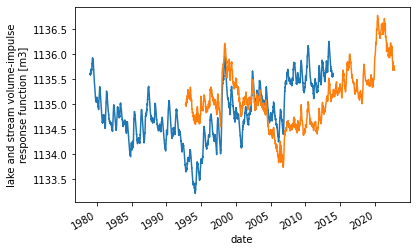

In [3]:
merged_dataset['ele'] = merged_dataset['IRFvolume'].copy()
merged_dataset['ele'][:] = merged_dataset['ele'][:]/(68800*10**6)
merged_dataset['ele'][:] = merged_dataset['ele'][:] + 1122.86
merged_dataset['ele'][:,1].plot()

# read the Dahitti data set
lake_elevation = pd.read_csv('../data/DAHITI_Data/Lake_Victoria.csv')
print(lake_elevation)
lake_elevation['date']  = pd.DatetimeIndex(lake_elevation['date'])
lake_elevation = lake_elevation.set_index('date')
print(lake_elevation)
lake_elevation['water_level'].plot()


<xarray.DataArray 'IRFvolume' ()>
array(8.76469e+11, dtype=float32)
Coordinates:
    time     datetime64[ns] 1979-01-01
Attributes:
    long_name:  lake and stream volume-impulse response function
    units:      m3

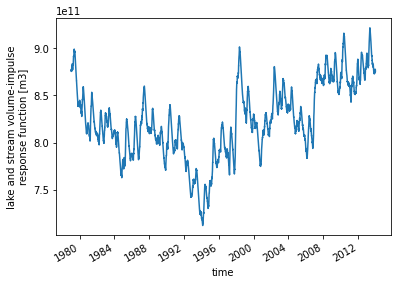

In [4]:
merged_dataset['IRFvolume'][:,1].plot()
merged_dataset['IRFvolume'][0,1]

            date  water_level  error
0     1992-09-27     1135.000  0.000
1     1992-10-07     1135.023  0.001
2     1992-10-17     1135.032  0.000
3     1992-10-27     1134.958  0.000
4     1992-11-06     1135.035  0.000
...          ...          ...    ...
1075  2022-09-07     1135.759  0.001
1076  2022-09-17     1135.755  0.002
1077  2022-09-27     1135.730  0.000
1078  2022-10-07     1135.760  0.001
1079  2022-10-17     1135.682  0.001

[1080 rows x 3 columns]
            water_level  error
date                          
1992-09-27     1135.000  0.000
1992-10-07     1135.023  0.001
1992-10-17     1135.032  0.000
1992-10-27     1134.958  0.000
1992-11-06     1135.035  0.000
...                 ...    ...
2022-09-07     1135.759  0.001
2022-09-17     1135.755  0.002
2022-09-27     1135.730  0.000
2022-10-07     1135.760  0.001
2022-10-17     1135.682  0.001

[1080 rows x 2 columns]


<AxesSubplot:xlabel='date', ylabel='routed runoff in each reach-\nimpulse response function\n[m3/s]'>

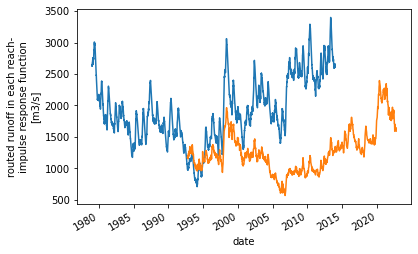

In [5]:
merged_dataset['IRFroutedRunoff'][:,0].plot()


# read the Dahitti data set
lake_elevation = pd.read_csv('../data/DAHITI_Data/Lake_Victoria.csv')
print(lake_elevation)
lake_elevation['date']  = pd.DatetimeIndex(lake_elevation['date'])
lake_elevation = lake_elevation.set_index('date')
print(lake_elevation)
lake_elevation['outflow'] =  66.3 * ((lake_elevation['water_level']-1122.86 - 7.96)**2.01)
lake_elevation['outflow'].plot()


In [6]:
ds = xr.open_dataset('../mizuRoute/output/case_0_1.000.r.1979-01-01-00000.nc')

ds

<xarray.Dataset>
Dimensions:          (seg: 518, tbound: 2, hist_fil: 1, ens: 1, tdh: 9, tdh_irf: 3, hru: 518)
Dimensions without coordinates: seg, tbound, hist_fil, ens, tdh, tdh_irf, hru
Data variables: (12/15)
    nNodes           int32 ...
    nt               int32 ...
    reachID          (seg) int32 ...
    restart_time     datetime64[ns] ...
    history_time     (tbound) datetime64[ns] ...
    time_bound       (tbound) float32 ...
    ...               ...
    numQF            (ens, seg) int32 ...
    irf_qfuture      (ens, tdh_irf, seg) float64 ...
    volume_irf       (ens, tbound, seg) float64 ...
    IRFroutedRunoff  (seg) float64 ...
    IRFvolume        (seg) float64 ...
    basRunoff        (hru) float64 ...